- Queremos processar coisas do tipo:
~~~c
int var1;
char text1, text, text3;
bool flag; float numeroQuebrado;
double numero1, bool;
~~~
- Depois o autômato vai fazer as validações necessárias para verificar se a declaração inserida é aceita ou não.

# Ideia Fundamental do Autômato
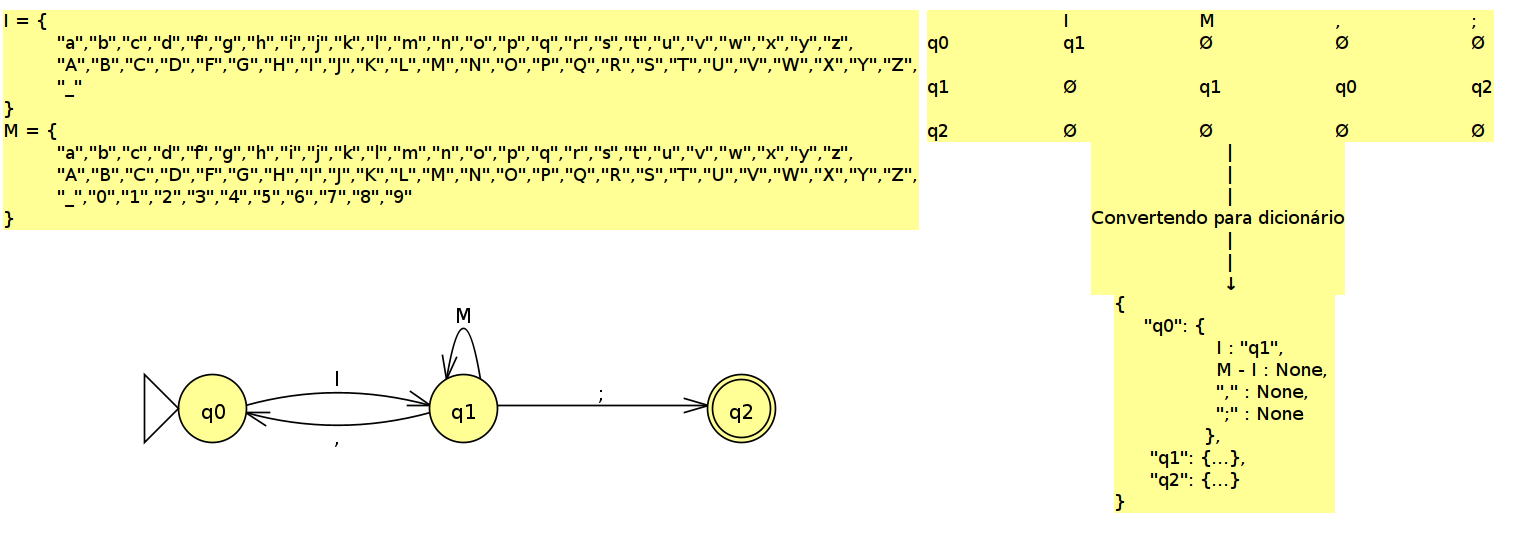

# Definindo a função de transição a partir de um dicionário

- Para iniciar, o nosso dicionário precisa ter a seguinte estrutura:

~~~Python
"""
MONTANDO A ESTRUTURA DA FUNÇÃO DE TRANSIÇÃO
transitions = {
    "q0":{
        "a": "q1", "b": "q1", ... ,"z": "q1", "A": "q1", "B": "q1", ... ,"Z": "q1", "_": "q1"
        },
    "q1":{
        "a": "q1", "b": "q1", ... ,"z": "q1", "A": "q1", "B": "q1", ... ,"Z": "q1", "_": "q1", 
        "0":"q1", "1": "q1", ... ,"9":"q1", ",": "q0", ";":"qf"
        },
    "qf":{
        "a": None, "b": None, ... ,"z": None, "A": None, "B": None, ... ,"Z": None, "_": None,
        "0": None, "1": None, ... ,"9": None, ",": None, ";": None
        }
    }
"""
~~~

In [ ]:
import string
from pprint import pprint

I = {*(string.ascii_letters + "_")}
M = {*(string.ascii_letters + string.digits + "_")}
MDI = M.difference(I)
IUM = I.union(M)

transitions = {}

transitions["q0"] = {
                    symbol: "q1" if not symbol.isdigit() and symbol != "," and symbol != ";" 
                    else None 
                    for symbol in M.union({",", ";"}) 
                    }

transitions["q1"] = {
                    symbol: "q1" if symbol != "," and symbol != ";" 
                    else "q0" if symbol == "," 
                    else "qf"
                    for symbol in M.union({",", ";"})
                    }

transitions["qf"] = {
                    symbol: None
                    for symbol in M.union({",", ";"})
                    }

pprint(transitions)

{'q0': {',': None,
        '0': None,
        '1': None,
        '2': None,
        '3': None,
        '4': None,
        '5': None,
        '6': None,
        '7': None,
        '8': None,
        '9': None,
        ';': None,
        'A': 'q1',
        'B': 'q1',
        'C': 'q1',
        'D': 'q1',
        'E': 'q1',
        'F': 'q1',
        'G': 'q1',
        'H': 'q1',
        'I': 'q1',
        'J': 'q1',
        'K': 'q1',
        'L': 'q1',
        'M': 'q1',
        'N': 'q1',
        'O': 'q1',
        'P': 'q1',
        'Q': 'q1',
        'R': 'q1',
        'S': 'q1',
        'T': 'q1',
        'U': 'q1',
        'V': 'q1',
        'W': 'q1',
        'X': 'q1',
        'Y': 'q1',
        'Z': 'q1',
        '_': 'q1',
        'a': 'q1',
        'b': 'q1',
        'c': 'q1',
        'd': 'q1',
        'e': 'q1',
        'f': 'q1',
        'g': 'q1',
        'h': 'q1',
        'i': 'q1',
        'j': 'q1',
        'k': 'q1',
        'l': 'q1',
        'm': 'q1',
        'n':

# Definindo a classe DFA

- Agora a tarefa principal vai ser apenas tratar as entradas para corrigir possíveis espaços em branco
- E além disso devemos fazer as verificações usando condicionais e o try/except para saber se a palavra vai ser recusada ou aceita
- Por fim, também precisamos identificar e verificar os possíveis tipos primitivos e na saída final, caso a palavra seja aceita, precisamos mostrar quem são os tipos primitivos e quem são as variáveis de maneira organizada
- Para isso, a nossa classe vai ter 5 atributos:
  - ```alphabet```
  - ```states```
  - ```transitions```
  - ```initialState```
  - ```finalState```
- Também vai ter 2 métodos:
  - ```splitEntryData()```: que recebe uma string como parâmetro e faz os tratamentos para espaços em branco e devolve um dicionário contendo o tipo primitivo na chave ```primitiveType``` e o nome das variáveis na chave ```variablesName```
  - ```run()```: que vai receber a declaração de variável do usuário e executar o autômato a partir do estado inicial que foi passado em ```initialState```

In [ ]:
import re

class DFA:
    def __init__(self, alphabet:set, states:set, transitions:dict,initialState:str, finalState:str):
        self.alphabet = alphabet
        self.states = states
        self.transitions = transitions
        self.initialState = initialState
        self.finalState = finalState 

    def splitEntryData(self, string:str):
        __allowedTypes = ["int", "char", "bool", "float", "double"]
        __primitiveType = string.split(" ", 1)[0]
        if __primitiveType in __allowedTypes:
            __variablesName = string.split(" ", 1)[1]
            __variablesList = [variable.strip() for variable in __variablesName.split(",")]
            __variablesList[-1] = re.sub(r"\s+;", ";", __variablesList[-1])
            __variablesName = ",".join(__variablesList)
            return {"primitiveType": __primitiveType, "variablesName": __variablesName}
        else:
            return f"Erro de Declaração de Tipo: {__primitiveType}"
        

    def run(self, string:str):
        __currentState = self.initialState

        entryData = self.splitEntryData(string) 

        if type(entryData) == dict:
            for index, character in enumerate(entryData["variablesName"]):
                try:
                    # print(f"{__currentState} --- {character} --->", end=" ")
                    __currentState = self.transitions[__currentState][character]
                    if __currentState == self.finalState:
                      break
                    # print(__currentState)  
                except KeyError as err:
                    # if not err.args[0]:
                    #     print(f"\033[1;31mprocessamento não faz parte da função de transição\033[m")
                    # else:
                    #     print(f"\033[1;31mo caracter '{character}' não pertence ao alfabeto\033[m")
                    break
            try:
              flag = True
              finalCharacterIndex = entryData["variablesName"].index(";")
              variablesName = entryData["variablesName"][0:finalCharacterIndex]
              reservedWord = True
              for variable in variablesName.split(","):
                if variable in ["int", "char", "bool", "float", "double"]:
                  reservedWord = False
                  break
            except:
              flag = False
            
                              
            if __currentState == self.finalState and reservedWord and flag:
                print("\033[1;32mpalavra aceita\033[m")
                print(f"Tipo primitivo: {entryData['primitiveType']}\nVariáveis: {variablesName.split(',')}")
                nextDeclaration = entryData["variablesName"][finalCharacterIndex+1:]
                self.run(nextDeclaration.lstrip()) if nextDeclaration else print("\n")
               
            else:
                print("\033[1;31mpalavra recusada\033[m\n")
        else:
            print(f'\033[1;31m{entryData}\033[m')

# Instanciando a Classe e Executando o Autômato

 - Agora basta instanciar a classe e executar o método run() com a declaração dada pelo usuário

In [ ]:
# CRIANDO O AUTÔMATO
dfa = DFA(
    alphabet=IUM,
    states={"q0", "q1", "qf"},
    transitions=transitions,
    initialState="q0",
    finalState="qf"
    )

declaration = input()
dfa.run(declaration)

inid var;
Erro de Declaração de Tipo: inid
